# Worldwide Emotional Trends for past-5 years

--> Using google trends, collected the information of emotions that were searched in google all over the world.

--> Given some keywords of emotions like happy, sad, neutral, excited..... etc to find out on which date,year an so where it was happened.

--> Here used the package named 'pytrends' to fetch data from google.

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
emotion_mapping = {
    "happy": ["what to do when I'm happy","Cloud nine"],
    "sad": ["what can I do when I feel sad","Feeling Blue"],
    "neutral": ["How to boost my mood"," nothing in particular"],
    "anxious": ["how to reduce anxiety", "calming techniques for anxiety"],
    "stressed": ["how to relieve stress", "stress management tips"],
    "excited": ["excitement", "calming down when excited"],
    "lonely": ["loneliness", "overcoming feelings of isolation"],
    "confident": ["building self-confidence", "boosting self-esteem"],
    "grateful": ["practicing gratitude", "expressing thankfulness"],
    "motivated": ["how to stay motivated", "maintaining motivation"],
    "angry": ["how to manage anger", "dealing with frustration"],
    "overwhelmed": ["being overwhelmed","managing overwhelming"],
    "inspired": ["inspiration", "staying inspired"],
    "relieved": ["how to find relief", "feeling relieved after stress"],
    "bored": ["what to do when bored", "overcoming boredom"],
    "hopeful": ["cultivating hope", "finding optimism"],
    "fearful": ["coping with fear", "overcoming fear"],
    "disappointed": ["disappointment", "moving past letdowns"],
    "calm": ["inner calm", "maintaining a peaceful mindset"],
    "energetic": ["how to increase energy levels", "boosting vitality"],
    "motivated": ["how to stay motivated", "maintaining enthusiasm"],
    "fulfilled": ["fulfillment", "living a meaningful life"],
    "proud": ["pride", "recognizing achievements"],
    "vulnerable": ["vulnerability", "embracing authenticity"],
    # Add more emotions and their corresponding phrases here
}



In [4]:
data_dict = {}

# Interest over time for emotions

In [5]:
df = pd.DataFrame()

In [6]:
for emotion, phrases in emotion_mapping.items():
    pytrends.build_payload(phrases, cat=0, timeframe='today 5-y', geo='IN', gprop='')
    interest_over_time = pytrends.interest_over_time()
    
    data_dict[emotion] = interest_over_time[phrases[0]]
    
    df[emotion] = data_dict[emotion]

    print(f"Search interest data for {emotion}:\n{interest_over_time}")
    



Search interest data for happy:
            what to do when I'm happy  Cloud nine  isPartial
date                                                        
2018-08-26                          0          50      False
2018-09-02                          0          51      False
2018-09-09                          0          41      False
2018-09-16                          0          44      False
2018-09-23                          0          49      False
...                               ...         ...        ...
2023-07-23                          0          48      False
2023-07-30                          0          54      False
2023-08-06                          0          47      False
2023-08-13                          0          46      False
2023-08-20                          0          36       True

[261 rows x 3 columns]
Search interest data for sad:
            what can I do when I feel sad  Feeling Blue  isPartial
date                                                  

In [7]:
df

,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,motivated,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
date,,,,,,,,,,,,,,,,,,,,,
2018-08-26,0,0,0,22,12,51,62,24,0,0,...,0,9,0,0,32,0,73,31,32,12
2018-09-02,0,0,0,18,49,38,70,0,0,24,...,0,8,0,0,27,0,0,33,37,13
2018-09-09,0,0,0,21,56,52,68,0,0,21,...,0,9,0,0,27,21,0,27,32,11
2018-09-16,0,0,0,8,47,47,63,0,0,36,...,34,16,0,0,21,0,0,31,30,11
2018-09-23,0,0,0,6,17,40,62,0,0,31,...,0,13,0,0,22,0,0,28,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-23,0,0,0,42,42,62,57,0,0,12,...,47,14,0,0,24,0,38,43,48,19
2023-07-30,0,0,0,58,49,64,62,0,0,32,...,18,13,0,0,32,18,26,38,51,18
2023-08-06,0,0,0,56,21,64,56,0,0,27,...,0,5,0,0,29,21,36,30,56,20


In [8]:
df.columns

Index(['happy', 'sad', 'neutral', 'anxious', 'stressed', 'excited', 'lonely',
       'confident', 'grateful', 'motivated', 'angry', 'overwhelmed',
       'inspired', 'relieved', 'bored', 'hopeful', 'fearful', 'disappointed',
       'calm', 'energetic', 'fulfilled', 'proud', 'vulnerable'],
      dtype='object')

In [9]:
df = pd.concat(data_dict, axis=1)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,date,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,2018-08-26,0,0,0,22,12,51,62,24,0,...,0,9,0,0,32,0,73,31,32,12
1,2018-09-02,0,0,0,18,49,38,70,0,0,...,0,8,0,0,27,0,0,33,37,13
2,2018-09-09,0,0,0,21,56,52,68,0,0,...,0,9,0,0,27,21,0,27,32,11
3,2018-09-16,0,0,0,8,47,47,63,0,0,...,34,16,0,0,21,0,0,31,30,11
4,2018-09-23,0,0,0,6,17,40,62,0,0,...,0,13,0,0,22,0,0,28,30,12


In [12]:
df.columns

Index(['date', 'happy', 'sad', 'neutral', 'anxious', 'stressed', 'excited',
       'lonely', 'confident', 'grateful', 'motivated', 'angry', 'overwhelmed',
       'inspired', 'relieved', 'bored', 'hopeful', 'fearful', 'disappointed',
       'calm', 'energetic', 'fulfilled', 'proud', 'vulnerable'],
      dtype='object')

In [13]:
df['date']

0     2018-08-26
1     2018-09-02
2     2018-09-09
3     2018-09-16
4     2018-09-23
         ...    
256   2023-07-23
257   2023-07-30
258   2023-08-06
259   2023-08-13
260   2023-08-20
Name: date, Length: 261, dtype: datetime64[ns]

In [14]:
# import datetime as dt

# df['date'] = pd.to_datetime(df['date'])  # Convert to datetime if not already

# df['date_only'] = df['date'].dt.date
# df['time_only'] = df['date'].dt.strftime('%H:%M:%S')

In [15]:
df

,date,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,2018-08-26,0,0,0,22,12,51,62,24,0,...,0,9,0,0,32,0,73,31,32,12
1,2018-09-02,0,0,0,18,49,38,70,0,0,...,0,8,0,0,27,0,0,33,37,13
2,2018-09-09,0,0,0,21,56,52,68,0,0,...,0,9,0,0,27,21,0,27,32,11
3,2018-09-16,0,0,0,8,47,47,63,0,0,...,34,16,0,0,21,0,0,31,30,11
4,2018-09-23,0,0,0,6,17,40,62,0,0,...,0,13,0,0,22,0,0,28,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-07-23,0,0,0,42,42,62,57,0,0,...,47,14,0,0,24,0,38,43,48,19
257,2023-07-30,0,0,0,58,49,64,62,0,0,...,18,13,0,0,32,18,26,38,51,18
258,2023-08-06,0,0,0,56,21,64,56,0,0,...,0,5,0,0,29,21,36,30,56,20
259,2023-08-13,0,0,0,46,33,57,56,23,0,...,17,16,17,0,34,15,0,43,61,18


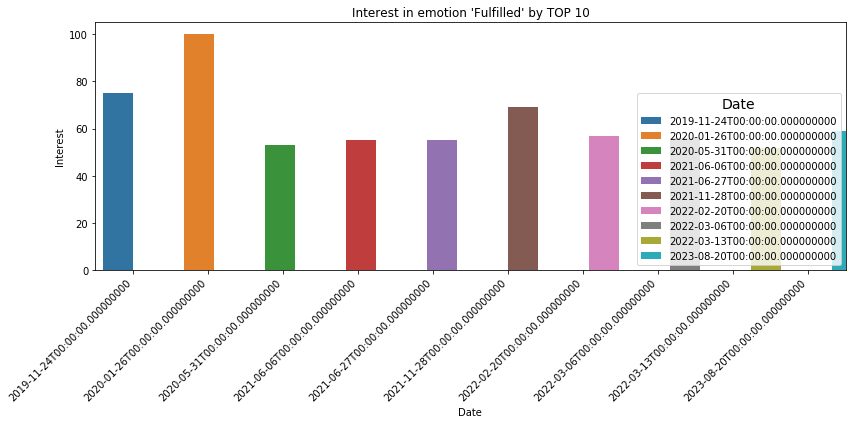

In [16]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "fulfilled")

ax = sns.barplot(data=subset_countries, x='date', y='fulfilled',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Fulfilled' by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 

plt.show()

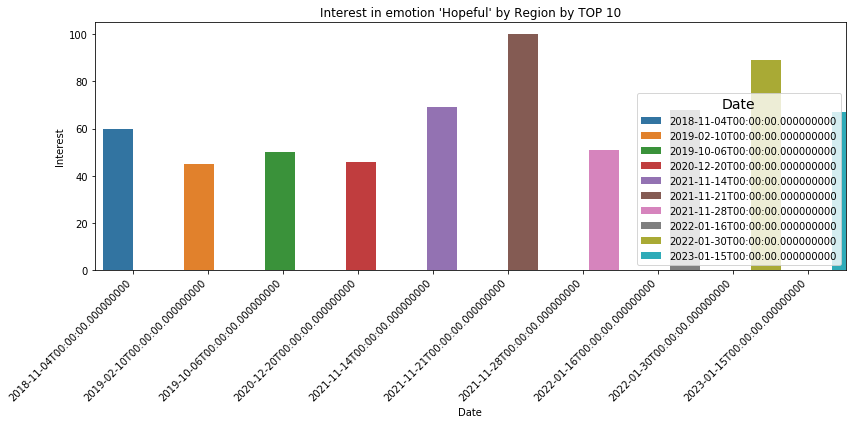

In [17]:
plt.figure(figsize=(12, 6))

subset_countries = df.nlargest(10, "hopeful")

ax = sns.barplot(data=subset_countries, x='date', y='hopeful',hue = 'date')

ax.legend(title="Date", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Date")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Hopeful' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

In [18]:
# df.to_excel("manam.xlsx", index=False)

In [19]:
df['date'].dtype

dtype('<M8[ns]')

In [20]:
# df['date_only'].dtype

In [21]:
# df['time_only'].dtype

In [22]:
df.shape

(261, 24)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          261 non-null    datetime64[ns]
 1   happy         261 non-null    int32         
 2   sad           261 non-null    int32         
 3   neutral       261 non-null    int32         
 4   anxious       261 non-null    int32         
 5   stressed      261 non-null    int32         
 6   excited       261 non-null    int32         
 7   lonely        261 non-null    int32         
 8   confident     261 non-null    int32         
 9   grateful      261 non-null    int32         
 10  motivated     261 non-null    int32         
 11  angry         261 non-null    int32         
 12  overwhelmed   261 non-null    int32         
 13  inspired      261 non-null    int32         
 14  relieved      261 non-null    int32         
 15  bored         261 non-null    int32     

In [24]:
df.describe()

,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,motivated,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
count,261.0,261.0,261.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,0.0,0.0,0.0,40.134100,47.685824,65.747126,67.440613,6.639847,9.003831,29.080460,...,16.586207,19.065134,6.455939,0.0,31.478927,12.306513,12.812261,36.206897,44.191571,16.494253
std,0.0,0.0,0.0,17.844877,20.142782,14.386333,9.486900,13.912383,19.775956,14.860287,...,18.745185,9.112944,15.380400,0.0,7.764598,16.752896,20.034758,9.329611,11.155272,6.722305
min,0.0,0.0,0.0,0.000000,0.000000,38.000000,50.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.0,19.000000,0.000000,0.000000,18.000000,28.000000,8.000000
25%,0.0,0.0,0.0,27.000000,35.000000,54.000000,61.000000,0.000000,0.000000,20.000000,...,0.000000,13.000000,0.000000,0.0,27.000000,0.000000,0.000000,30.000000,36.000000,13.000000
50%,0.0,0.0,0.0,41.000000,48.000000,67.000000,66.000000,0.000000,0.000000,30.000000,...,15.000000,18.000000,0.000000,0.0,30.000000,0.000000,0.000000,35.000000,41.000000,16.000000
75%,0.0,0.0,0.0,52.000000,62.000000,76.000000,72.000000,0.000000,0.000000,38.000000,...,27.000000,23.000000,0.000000,0.0,35.000000,22.000000,25.000000,41.000000,50.000000,18.000000
max,0.0,0.0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [25]:
df.isnull().head()

,date,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Interest by region for emotions

In [26]:
df_region = pytrends.interest_by_region()

In [49]:
# Create an empty DataFrame to store the interest by region data
columns = ['geoCode'] + list(emotion_mapping.keys())
df_region = pd.DataFrame(columns=columns)

# Iterate through each emotion and fetch the interest by region data
for emotion, phrases in emotion_mapping.items():
    pytrends.build_payload(phrases, cat=0, timeframe='today 5-y', geo='IN', gprop='')
    interest_by_region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=True)
        
    # Get the data for the specific emotion and append it to the DataFrame
    emotion_data = interest_by_region[phrases[0]]
    df_region[emotion] = emotion_data
    
    print(f"Interest by region data for {emotion}:\n{interest_by_region}")

Interest by region data for happy:
                            geoCode  what to do when I'm happy  Cloud nine
geoName                                                                   
Andaman and Nicobar Islands   IN-AN                          0           0
Andhra Pradesh                IN-AP                          0         100
Arunachal Pradesh             IN-AR                          0           0
Assam                         IN-AS                          0         100
Bihar                         IN-BR                          0         100
Chandigarh                    IN-CH                          0         100
Chhattisgarh                  IN-CT                          0           0
Dadra and Nagar Haveli        IN-DN                          0           0
Daman and Diu                 IN-DD                          0           0
Delhi                         IN-DL                          0         100
Goa                           IN-GA                          0   

In [50]:
df_region

,geoCode,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
geoName,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,NaN,0,0,0,0,0,0,100,0,0,...,0,0,0,0,0,0,0,100,100,100
Andhra Pradesh,NaN,0,0,0,100,100,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
Arunachal Pradesh,NaN,0,0,0,0,0,100,100,0,0,...,0,0,0,0,0,0,0,0,100,100
Assam,NaN,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
Bihar,NaN,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
Chandigarh,NaN,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
Chhattisgarh,NaN,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
Dadra and Nagar Haveli,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
Daman and Diu,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0


In [51]:
df_region.reset_index(inplace=True)

In [52]:
df_region

,geoName,geoCode,happy,sad,neutral,anxious,stressed,excited,lonely,confident,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,Andaman and Nicobar Islands,NaN,0,0,0,0,0,0,100,0,...,0,0,0,0,0,0,0,100,100,100
1,Andhra Pradesh,NaN,0,0,0,100,100,100,100,0,...,0,100,0,0,100,0,0,100,100,100
2,Arunachal Pradesh,NaN,0,0,0,0,0,100,100,0,...,0,0,0,0,0,0,0,0,100,100
3,Assam,NaN,0,0,0,0,0,100,100,0,...,0,100,0,0,100,0,0,100,100,100
4,Bihar,NaN,0,0,0,0,0,100,100,0,...,0,100,0,0,100,0,0,100,100,100
5,Chandigarh,NaN,0,0,0,0,0,100,100,0,...,0,100,0,0,100,0,0,100,100,100
6,Chhattisgarh,NaN,0,0,0,0,0,100,100,0,...,0,100,0,0,100,0,0,100,100,100
7,Dadra and Nagar Haveli,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
8,Daman and Diu,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
9,Delhi,NaN,0,0,0,100,100,100,100,0,...,0,100,0,0,100,0,0,100,100,100


In [53]:
df_region = df_region.drop(columns = 'geoCode' ,axis=1)

In [54]:
df_region

,geoName,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,Andaman and Nicobar Islands,0,0,0,0,0,0,100,0,0,...,0,0,0,0,0,0,0,100,100,100
1,Andhra Pradesh,0,0,0,100,100,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
2,Arunachal Pradesh,0,0,0,0,0,100,100,0,0,...,0,0,0,0,0,0,0,0,100,100
3,Assam,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
4,Bihar,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
5,Chandigarh,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
6,Chhattisgarh,0,0,0,0,0,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100
7,Dadra and Nagar Haveli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
8,Daman and Diu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
9,Delhi,0,0,0,100,100,100,100,0,0,...,0,100,0,0,100,0,0,100,100,100


In [55]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geoName       36 non-null     object
 1   happy         36 non-null     int32 
 2   sad           36 non-null     int32 
 3   neutral       36 non-null     int32 
 4   anxious       36 non-null     int32 
 5   stressed      36 non-null     int32 
 6   excited       36 non-null     int32 
 7   lonely        36 non-null     int32 
 8   confident     36 non-null     int32 
 9   grateful      36 non-null     int32 
 10  motivated     36 non-null     int32 
 11  angry         36 non-null     int32 
 12  overwhelmed   36 non-null     int32 
 13  inspired      36 non-null     int32 
 14  relieved      36 non-null     int32 
 15  bored         36 non-null     int32 
 16  hopeful       36 non-null     int32 
 17  fearful       36 non-null     int32 
 18  disappointed  36 non-null     int32 
 19  calm      

In [56]:
df_region.isnull().head()

,geoName,happy,sad,neutral,anxious,stressed,excited,lonely,confident,grateful,...,relieved,bored,hopeful,fearful,disappointed,calm,energetic,fulfilled,proud,vulnerable
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Barplot Visualizing Interest in Various Emotions

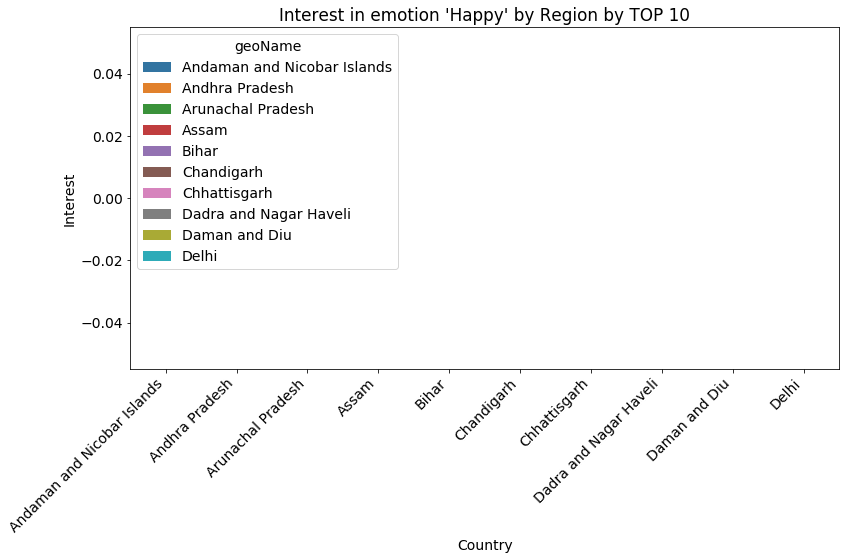

In [57]:
plt.figure(figsize=(12, 8))

subset_countries = df_region.nlargest(10, "happy")

ax = sns.barplot(data=subset_countries, x='geoName', y='happy',hue = 'geoName')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Happy' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

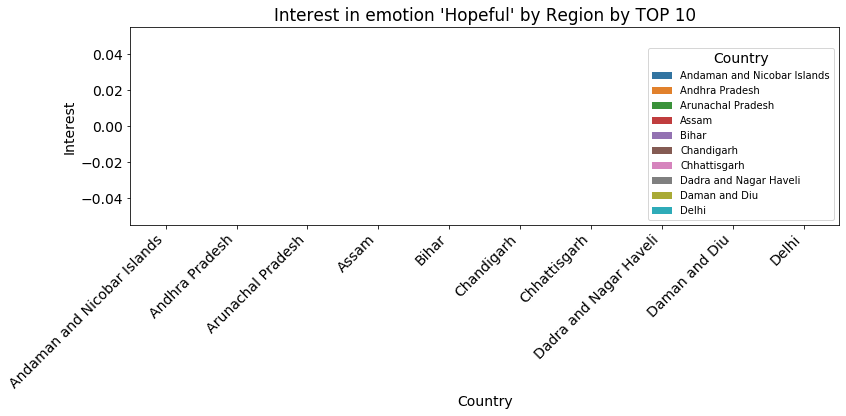

In [58]:
plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "hopeful")

ax = sns.barplot(data=subset_countries, x='geoName', y='hopeful',hue = 'geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Hopeful' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

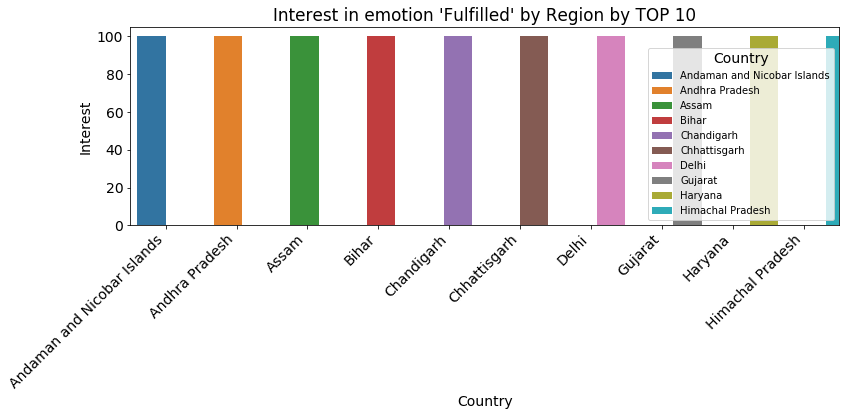

In [59]:
plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "fulfilled")

ax = sns.barplot(data=subset_countries, x='geoName', y='fulfilled',hue = 'geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Fulfilled' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 

plt.show()

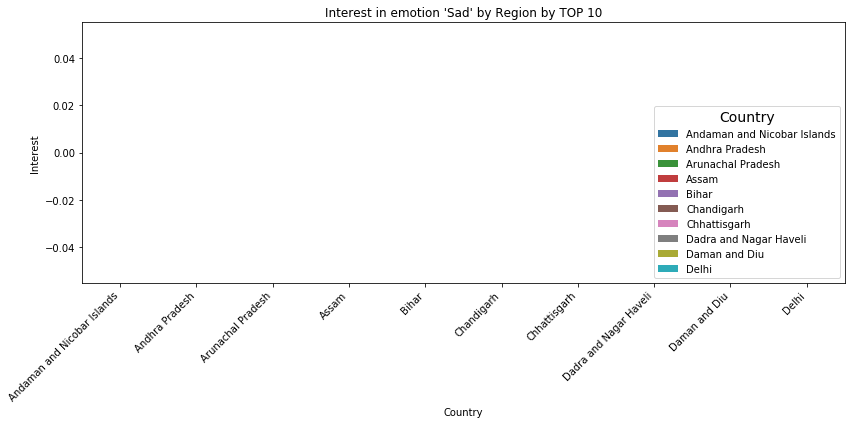

In [38]:
plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "sad")

ax = sns.barplot(data=subset_countries, x='geoName', y='sad',hue = 'geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Sad' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

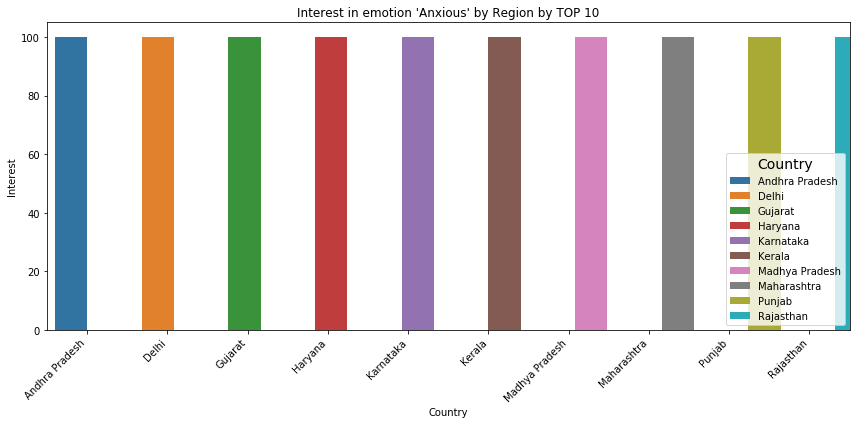

In [39]:
plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "anxious")

ax = sns.barplot(data=subset_countries, x='geoName', y='anxious',hue = 'geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Anxious' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

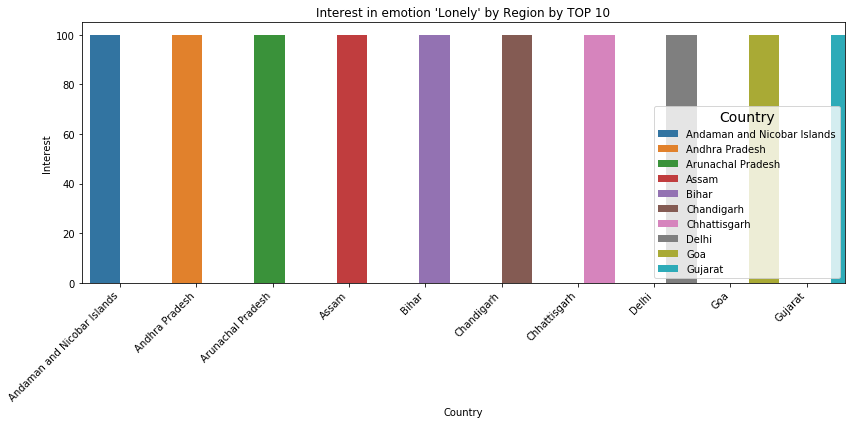

In [40]:
plt.figure(figsize=(12,6))

subset_countries = df_region.nlargest(10, "lonely")

ax = sns.barplot(data=subset_countries, x='geoName', y='lonely',hue='geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Lonely' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

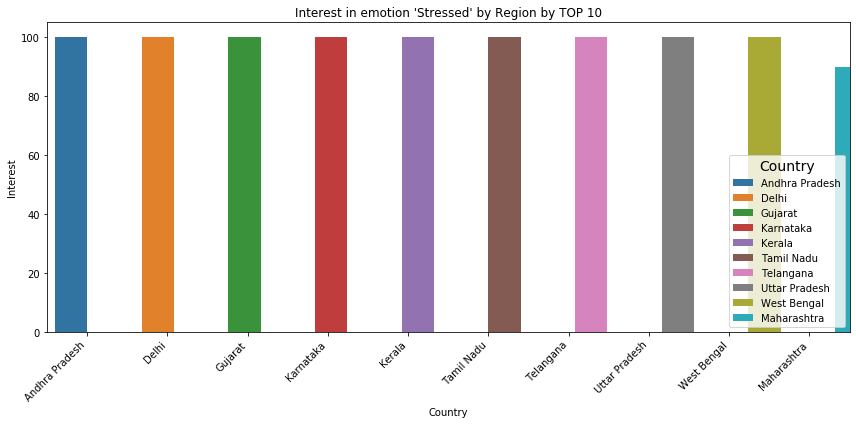

In [41]:
plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "stressed")

ax = sns.barplot(data=subset_countries, x='geoName', y='stressed',hue='geoName')

ax.legend(title="Country", title_fontsize=14, fontsize=10, bbox_to_anchor=(1, 0), loc='lower right')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Interest in emotion 'Stressed' by Region by TOP 10")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

for bar in ax.patches:
    bar.set_width(0.4) 
    
plt.show()

# Distribution of data visualization interest in emotions

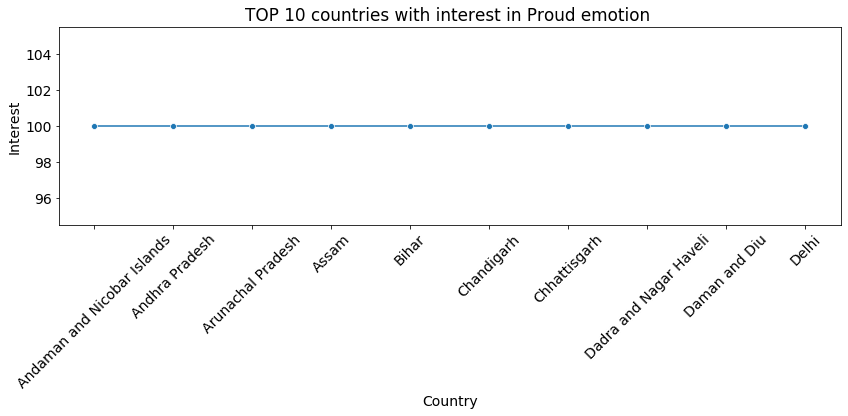

In [42]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 6))

subset_countries = df_region.nlargest(10, "proud")

ax = sns.lineplot(data=subset_countries, x='geoName', y='proud', marker = 'o')

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("TOP 10 countries with interest in Proud emotion ")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

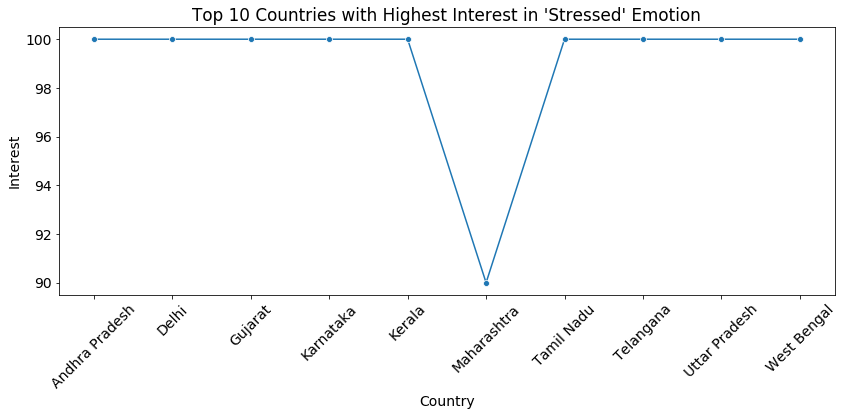

In [43]:
plt.rcParams.update({'font.size': 14})

# Select the top countries with the highest interest in the "stressed" emotion
subset_countries = df_region.nlargest(10, "stressed")

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=subset_countries, x='geoName', y='stressed', marker="o")

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Top 10 Countries with Highest Interest in 'Stressed' Emotion")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


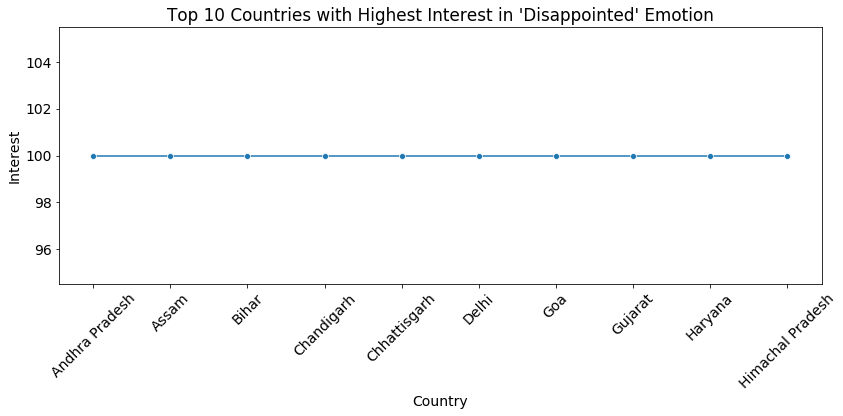

In [44]:
plt.rcParams.update({'font.size': 14})

# Select the top countries with the highest interest in the "stressed" emotion
subset_countries = df_region.nlargest(10, "disappointed")

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=subset_countries, x='geoName', y='disappointed', marker="o")

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Top 10 Countries with Highest Interest in 'Disappointed' Emotion")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

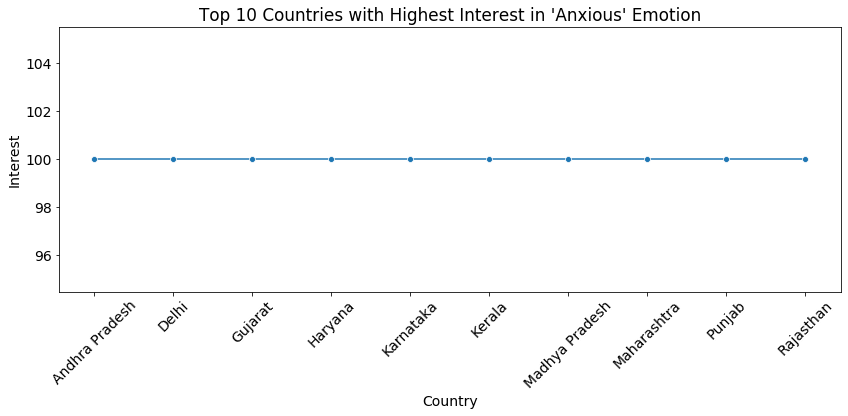

In [45]:
plt.rcParams.update({'font.size': 14})

# Select the top countries with the highest interest in the "stressed" emotion
subset_countries = df_region.nlargest(10, "anxious")

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=subset_countries, x='geoName', y='anxious', marker="o")

plt.xlabel("Country")
plt.ylabel("Interest")
plt.title("Top 10 Countries with Highest Interest in 'Anxious' Emotion")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [46]:
#Save the DataFrame to a CSV file
df.to_csv("manam.csv", index=False)
df_region.to_csv("manam_region.csv",index=False)

In [47]:
#Save the DataFrame to a EXCEL file
df.to_excel("manam.xlsx", index=False)
df_region.to_excel("manam_region.xlsx",index=False)

In [60]:
#Save the DataFrame_in to a EXCEL file
df.to_excel("manam_in.xlsx", index=False)
df_region.to_excel("manam_region_in.xlsx",index=False)